# 🧠 Diabetes Prediction Project

## 🔹 1.1 Import Libraries

In [314]:

"""
Library Overview:
- pandas: For handling data in tabular form.
- numpy: For numerical operations.
- matplotlib.pyplot & seaborn: For visualizing data.
- sklearn: For machine learning tasks like SVM, train-test split.
- pickle: For saving trained machine learning models.
"""

import pandas as pd              # DataFrame creation and manipulation
import numpy as np               # Numerical operations
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns            # Statistical plots

from sklearn.model_selection import train_test_split   # Data splitting
from sklearn.svm import SVC                             # Support Vector Classifier
from sklearn.metrics import classification_report, confusion_matrix  # Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix   # Model Training
import pickle  # For saving the model



## 🧠 1.2 — Load Dataset Function with Proper Documentation

In [317]:
class DiabetesDataset:
    """
    Class Overview:
    A class for loading the diabetes dataset and displaying basic information.

    Methods:
    - load_data: Loads the dataset from the given CSV file.
    - display_info: Displays structural information about the dataset using .info().
    - display_head: Displays the first few rows of the dataset using .head().
    """

    def __init__(self, file_path):
        """
        Initializes the DiabetesDataset class with the file path of the dataset.

        Parameters:
        - file_path: str → Path to the CSV file.
        """
        self.file_path = file_path
        self.data = None

    def load_data(self):
        """
        Loads the diabetes dataset from the given file path.

        Returns:
        - df: pandas DataFrame containing the dataset
        """
        self.data = pd.read_csv(self.file_path)
        print("✅ Dataset loaded successfully.")
        return self.data

    def display_info(self):
        """
        Displays basic structural information about the dataset using .info().
        """
        if self.data is not None:
            print("\nDataset Info:")
            self.data.info()
        else:
            print("❌ Data not loaded. Please load the data first using the load_data() method.")

    def display_head(self):
        """
        Displays the first few rows of the dataset using .head().
        """
        if self.data is not None:
            print("\nData Preview (First 5 Rows):")
            print(self.data.head())
        else:
            print("❌ Data not loaded. Please load the data first using the load_data() method.")



## 📊 2.1 — Null & Empty Value Checker Function


In [320]:
class MissingValueChecker:
    """
    Class Overview:
    A class for checking missing (null) values in the dataset.

    Method:
    - check_missing: Checks for null or empty values in the dataset.
    """
    
    def __init__(self, data):
        """
        Initializes the MissingValueChecker with the dataset.

        Parameters:
        - data: pandas DataFrame → The dataset to check for missing values.
        """
        self.data = data

    def check_missing(self):
        """
        Checks for missing (null) values in the dataset and prints the total missing values.
        """
        if self.data is not None:
            print("\n🔍 Null values in dataset:")
            print(self.data.isnull().sum())  # Print the sum of null values in each column
            print("\n✅ Any Null Present? ", self.data.isnull().values.any())  # Check if there are any null values
        else:
            print("❌ Data not loaded. Please load the data first.")


## 📈 2.2 — Univariate Analysis Class


In [323]:
class UnivariateAnalysis:
    """
    Class to generate various univariate plots.
    """

    @staticmethod
    def histogram(data, column, bins=10, color='blue', title='Histogram'):
        """
        Function Overview:
        Draws histogram for single column.

        Parameters:
        - data: required
        - column: column name (str)
        - bins: default is 10
        - color: default is 'blue'
        - title: title of the plot

        Description:
        Shows distribution of data in the selected column.
        """
        plt.figure(figsize=(8, 4))
        plt.hist(data[column], bins=bins, color=color, edgecolor='black')
        plt.title(title)
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

    @staticmethod
    def boxplot(data, column, color='green', title='Box Plot'):
        """
        Function Overview:
        Draws a boxplot for a single column.

        Parameters:
        - data: required
        - column: column name (str)
        - color: default is 'green'
        - title: title of the plot

        Description:
        Displays summary of distribution (median, IQR, outliers).
        """
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=data[column], color=color)
        plt.title(title)
        plt.grid(True)
        plt.show()


### 📈 2.2.1 — Count Plot Class


In [326]:

"""
Class Overview:
Draws count plot for categorical features.

Method:
- count_plot: For visualizing frequency distribution.
"""

class AdditionalUnivariate1:
    @staticmethod
    def count_plot(data, column="Outcome", color="salmon", title="Outcome Count Plot"):
        """
        Function Overview:
        Plots a countplot for a categorical column.

        Parameters:
        - data: required
        - column: default is 'Outcome'
        - color: default is 'salmon'
        - title: plot title

        Description:
        Displays how many times each category appears.
        """
        plt.figure(figsize=(6, 4))
        sns.countplot(x=data[column], color=color)
        plt.title(title)
        plt.grid(axis="y")
        plt.show()


### 📈 2.2.2 — KDE Plot Class


In [329]:

"""
Class Overview:
Draws kernel density plot for numeric features.

Method:
- kde_plot: For visualizing continuous distribution smoothness.
"""

class AdditionalUnivariate2:
    @staticmethod
    def kde_plot(data, column="BMI", color="orchid", title="KDE Plot of BMI"):
        """
        Function Overview:
        Plots a kernel density estimation (KDE) plot.

        Parameters:
        - data: required
        - column: default is 'BMI'
        - color: default is 'orchid'
        - title: plot title

        Description:
        Visualizes smooth distribution of continuous data.
        """
        plt.figure(figsize=(6, 4))
        sns.kdeplot(data[column], fill=True, color=color)
        plt.title(title)
        plt.grid(True)
        plt.show()

## 📉 2.3 — Bivariate Analysis Class


In [332]:

"""
Class Overview:
Provides visualizations for relationships between pairs of variables.

Methods:
- heatMap: Correlation heatmap
- scatter: Scatter plot between any two variables
"""

class BivariateAnalysis:
    @staticmethod
    def heatMap(data, width=10, height=8, annot=True, cmap="coolwarm", title="Correlation Heatmap"):
        """
        Function Overview:
        Draws heatmap of correlation matrix.

        Parameters:
        - data: required
        - width: default = 10
        - height: default = 8
        - annot: default = True
        - cmap: default = "coolwarm"
        - title: plot title

        Description:
        Shows pairwise correlations with color gradients and numerical values.
        """
        plt.figure(figsize=(width, height))
        sns.heatmap(data.corr(), annot=annot, cmap=cmap, fmt=".2f")
        plt.title(title)
        plt.show()

    @staticmethod
    def scatter(data, x, y, hue=None, title="Scatter Plot"):
        """
        Function Overview:
        Plots a scatter plot between two columns.

        Parameters:
        - data: required
        - x: column for x-axis
        - y: column for y-axis
        - hue: optional column for color grouping
        - title: plot title

        Description:
        Explores relationships between two continuous variables.
        """
        plt.figure(figsize=(7, 5))
        sns.scatterplot(data=data, x=x, y=y, hue=hue)
        plt.title(title)
        plt.grid(True)
        plt.show()


### 📉 2.3.1 — Custom Scatter Plot Classes for Feature vs Outcome


In [335]:

"""
Each class below creates a specific scatter plot between one feature and the target 'Outcome'.
They help visually evaluate patterns, clusters, or relationships.
"""

class ScatterGlucoseVsOutcome:
    @staticmethod
    def plot(data):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=data, x="Glucose", y="Outcome", color="crimson")
        plt.title("Glucose vs Outcome")
        plt.grid(True)
        plt.show()

class ScatterBMIvsOutcome:
    @staticmethod
    def plot(data):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=data, x="BMI", y="Outcome", color="darkgreen")
        plt.title("BMI vs Outcome")
        plt.grid(True)
        plt.show()

class ScatterAgeVsOutcome:
    @staticmethod
    def plot(data):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=data, x="Age", y="Outcome", color="chocolate")
        plt.title("Age vs Outcome")
        plt.grid(True)
        plt.show()

class ScatterInsulinVsOutcome:
    @staticmethod
    def plot(data):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=data, x="Insulin", y="Outcome", color="teal")
        plt.title("Insulin vs Outcome")
        plt.grid(True)
        plt.show()


### 📉 2.3.2 — Bar Plot Class


In [338]:
class AdditionalBivariate1:
    @staticmethod
    def bar_plot(data, x_col="Pregnancies", y_col="Outcome", color="Blues", title="Average Outcome by Pregnancies"):
        """
        Function Overview:
        Draws a barplot showing mean Outcome grouped by x_col, with hue assigned to x_col to maintain color palette.

        Parameters:
        - data: required
        - x_col: default = 'Pregnancies'
        - y_col: default = 'Outcome'
        - color: seaborn palette or color string
        - title: plot title

        Description:
        Helps analyze average outcome against grouped categories.
        """
        plt.figure(figsize=(10, 5))
        sns.barplot(x=x_col, y=y_col, data=data, hue=x_col, palette=color, legend=False)  # Assign x_col to hue
        plt.title(title)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()


### 🎻 2.3.3 — Violin Plot Class

In [341]:
class AdditionalBivariate2:
    @staticmethod
    def violin_plot(data, x="Outcome", y="Glucose", color="coolwarm", title="Glucose vs Outcome"):
        """
        Function Overview:
        Draws a violin plot between outcome classes and a continuous variable.

        Parameters:
        - data: required
        - x: default = 'Outcome'
        - y: default = 'Glucose'
        - color: seaborn palette
        - title: plot title

        Description:
        Shows distribution + IQR + density in one compact plot.
        """
        plt.figure(figsize=(7, 4))
        sns.violinplot(x=x, y=y, data=data, hue=x, palette=color, legend=False)  # Assign x to hue
        plt.title(title)
        plt.grid(True)
        plt.show()


### 📈 2.3.4 — Line Plot Class

In [344]:
class AdditionalBivariate3:
    @staticmethod
    def line_plot(data, y="BMI", title="BMI Trend Across Records"):
        """
        Function Overview:
        Draws a simple line plot showing trends over index.

        Parameters:
        - data: required
        - y: column to plot (default: 'BMI')
        - title: plot title

        Description:
        Trend visualization of feature over records.
        """
        plt.figure(figsize=(10, 4))
        sns.lineplot(data=data[y], marker="o", color="slateblue")
        plt.title(title)
        plt.xlabel("Index")
        plt.ylabel(y)
        plt.grid(True)
        plt.show()


 ## ✅ Step 3: Data Splitting


In [347]:
class DataSplitter:
    def __init__(self, data, target_column="Outcome"):
        """
        Initialize the DataSplitter class with the dataset and the target column.
        
        Parameters:
        - data: pandas DataFrame
        - target_column: str, column name for the target (default = 'Outcome')
        """
        self.data = data
        self.target_column = target_column

    def split_data(self, test_size=0.2, random_state=42):
        """
        Splits the data into training and testing sets.

        Parameters:
        - test_size: float, proportion of the data to include in the test split (default 0.2)
        - random_state: int, seed used by the random number generator (default 42)
        
        Returns:
        - X_train, X_test, y_train, y_test: Split datasets
        """
        # Features (X) and Target (y)
        X = self.data.drop(columns=[self.target_column])
        y = self.data[self.target_column]

        # Perform the train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        # Print the shapes of the splits
        print("✅ Data Splitting Complete:")
        print(f"Training Set Shape (Features): {X_train.shape}")
        print(f"Testing Set Shape (Features): {X_test.shape}")
        print(f"Training Set Shape (Target): {y_train.shape}")
        print(f"Testing Set Shape (Target): {y_test.shape}")

        return X_train, X_test, y_train, y_test

## Step 4: Model Training 🤖

In [350]:
class ModelTrainer:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.model = SVC()  # Initialize Support Vector Machine (SVM) classifier

    def train_model(self):
        """
        Function Overview:
        Trains the model using the training data.

        Returns:
        - trained model
        """
        # Train the SVM model
        self.model.fit(self.X_train, self.y_train)
        print("✅ Model Training Complete.")

    def evaluate_model(self):
        """
        Function Overview:
        Evaluates the trained model using the test data.

        Returns:
        - accuracy score, confusion matrix, classification report
        """
        # Predict the test set results
        y_pred = self.model.predict(self.X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(self.y_test, y_pred)
        
        # Generate classification report
        clf_report = classification_report(self.y_test, y_pred)
        
        # Generate confusion matrix
        conf_matrix = confusion_matrix(self.y_test, y_pred)
        
        # Print evaluation results
        print(f"Accuracy: {accuracy * 100:.2f}%")
        print("\nClassification Report:\n", clf_report)
        print("Confusion Matrix:\n", conf_matrix)

        return accuracy, clf_report, conf_matrix


## Step 5: Model Saving 📦


In [353]:
class ModelSaver:
    def __init__(self, model, filename="svm_model.pkl"):
        self.model = model
        self.filename = filename

    def save_model(self):
        """
        Function Overview:
        Saves the trained model using Pickle.
        
        Returns:
        - None
        """
        with open(self.filename, 'wb') as file:
            pickle.dump(self.model, file)
        print(f"✅ Model saved to {self.filename}.")

    def load_model(self):
        """
        Function Overview:
        Loads the saved model from Pickle.
        
        Returns:
        - model: the loaded model
        """
        with open(self.filename, 'rb') as file:
            model = pickle.load(file)
        print(f"✅ Model loaded from {self.filename}.")
        return model


# Execution Blocks

## 1.2: Data Load

In [357]:
diabetes_data = DiabetesDataset(file_path)  # Initialize the DiabetesDataset class

# Load the data
diabetes_data.load_data()

# Display info about the dataset
diabetes_data.display_info()

# Display the first 5 rows of the dataset
diabetes_data.display_head()

✅ Dataset loaded successfully.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Data Preview (First 5 Rows):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1      

## 1.3: Null Values

In [360]:

# Step 1: Load the dataset using pandas
df = pd.read_csv(file_path)

# Step 2: Create an instance of the MissingValueChecker class with the loaded dataset
missing_value_checker = MissingValueChecker(df)

# Step 3: Call the check_missing() method to check for missing values
missing_value_checker.check_missing()


🔍 Null values in dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

✅ Any Null Present?  False


## 1.4: Univariate Analysis Runner

📊 Histogram: Glucose


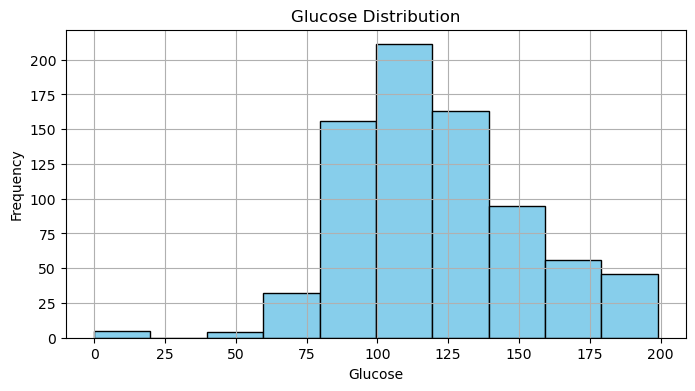

📊 Histogram: BMI


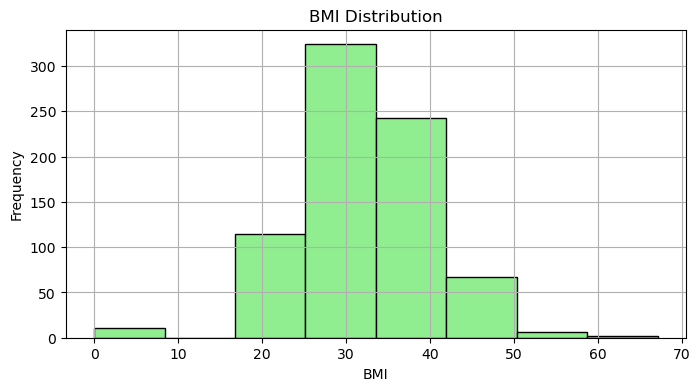

📊 Boxplot: SkinThickness


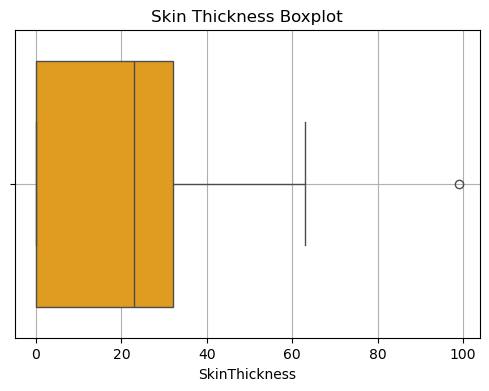

📊 Boxplot: Insulin


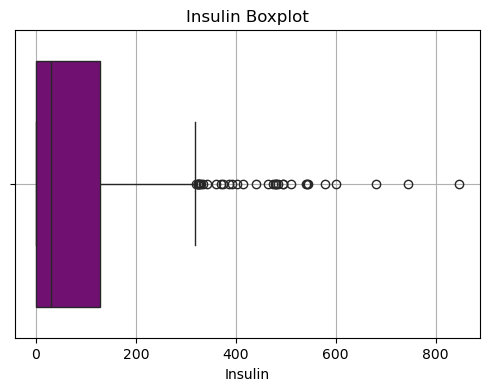

📊 Countplot: Outcome


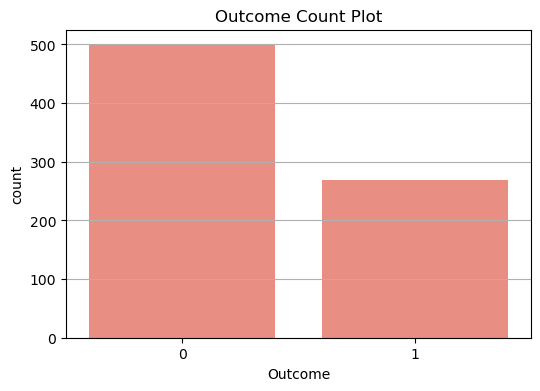

📊 KDE Plot: BMI


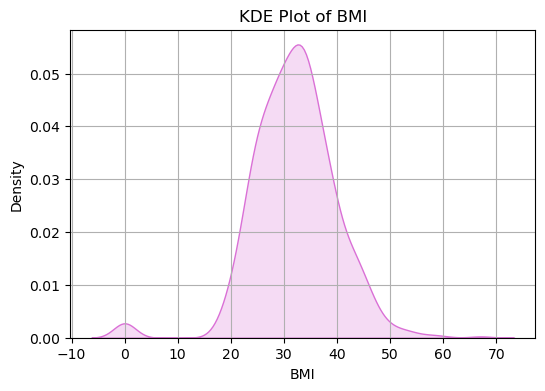

In [363]:

"""
Class Overview:
Executes all defined univariate plots from UnivariateAnalysis and AdditionalUnivariate classes.

Methods:
- run_all: Runs selected visualizations for core numeric and target variables.
"""

class UnivariateAnalysisRunner:
    def __init__(self, data):
        self.data = data

    def run_all(self):
        print("📊 Histogram: Glucose")
        UnivariateAnalysis.histogram(self.data, column="Glucose", bins=10, color="skyblue", title="Glucose Distribution")

        print("📊 Histogram: BMI")
        UnivariateAnalysis.histogram(self.data, column="BMI", bins=8, color="lightgreen", title="BMI Distribution")

        print("📊 Boxplot: SkinThickness")
        UnivariateAnalysis.boxplot(self.data, column="SkinThickness", color='orange', title="Skin Thickness Boxplot")

        print("📊 Boxplot: Insulin")
        UnivariateAnalysis.boxplot(self.data, column="Insulin", color='purple', title="Insulin Boxplot")

        print("📊 Countplot: Outcome")
        AdditionalUnivariate1.count_plot(self.data)

        print("📊 KDE Plot: BMI")
        AdditionalUnivariate2.kde_plot(self.data)

# Run all univariate graphs
uni_runner = UnivariateAnalysisRunner(data)
uni_runner.run_all()


## ✅ 2.5 — Bivariate Analysis Runner Class

🔥 Correlation HeatMap


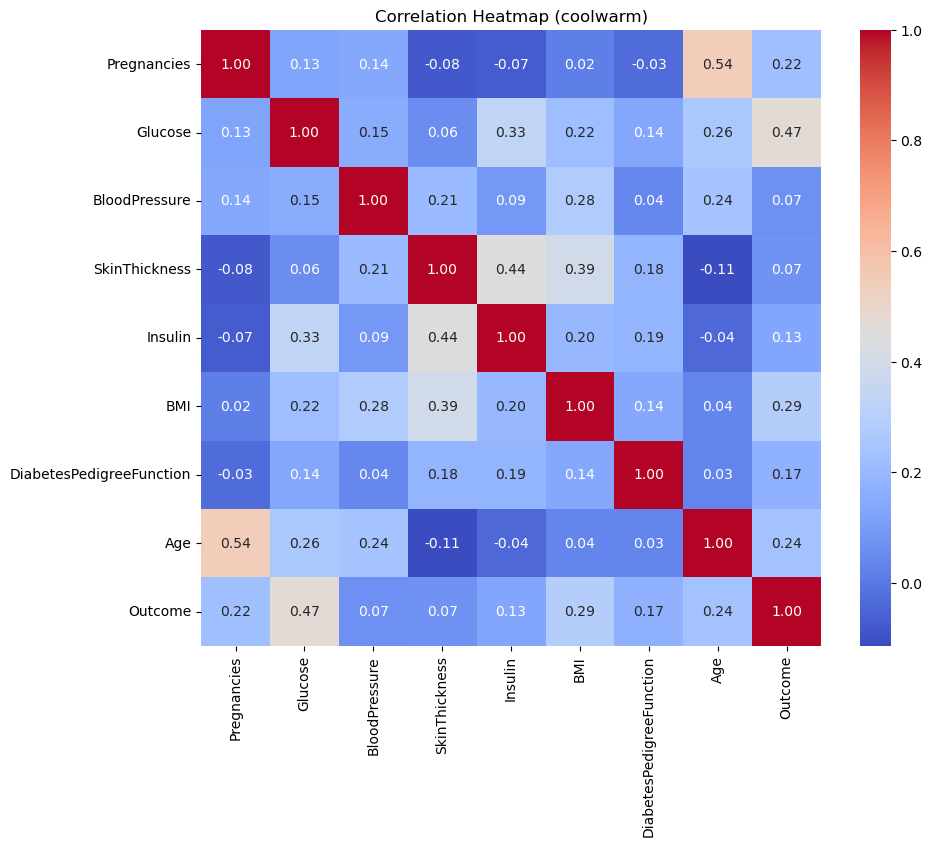

📈 Scatter: Glucose vs Outcome


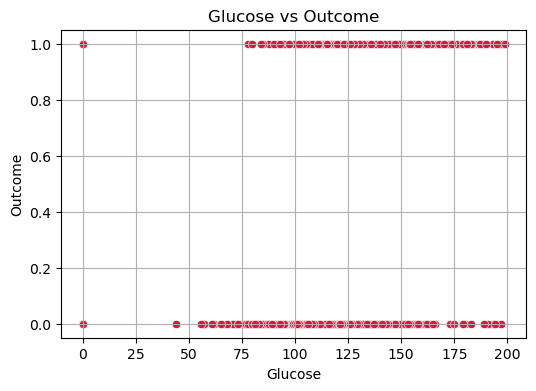

📈 Scatter: BMI vs Outcome


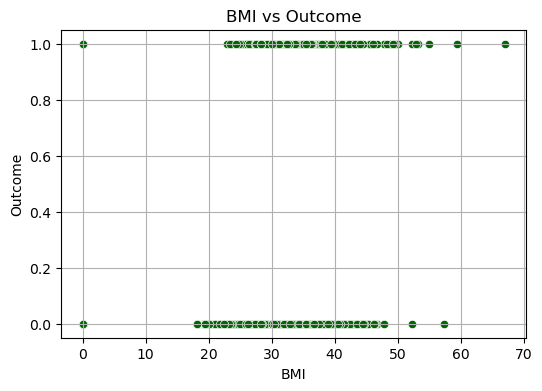

📈 Scatter: Age vs Outcome


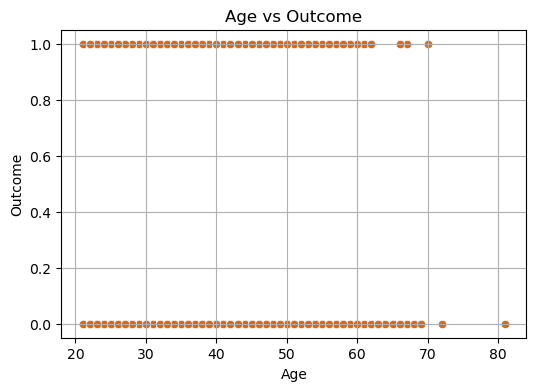

📈 Scatter: Insulin vs Outcome


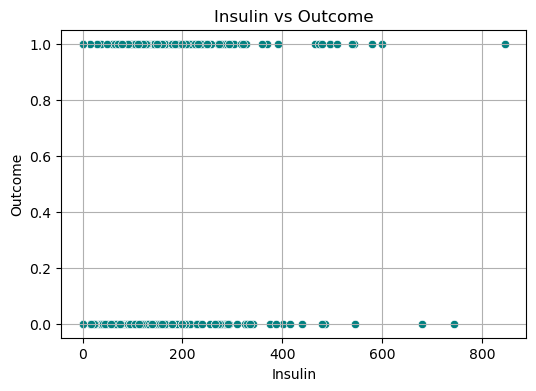

📊 Barplot: Outcome by Pregnancies


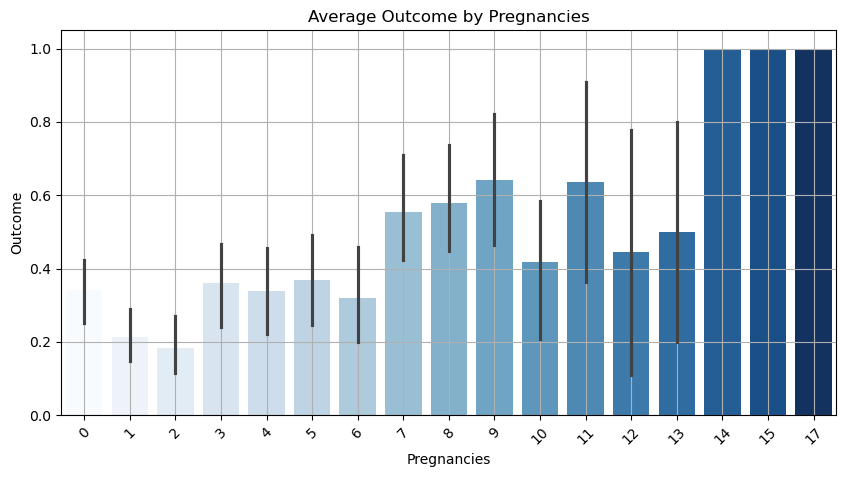

🎻 Violin Plot: Glucose vs Outcome


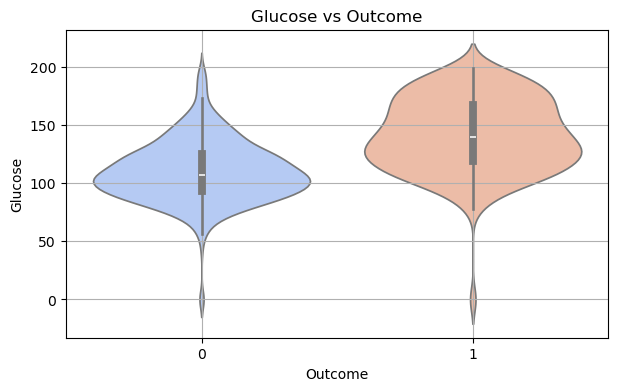

📉 Line Plot: BMI Trend


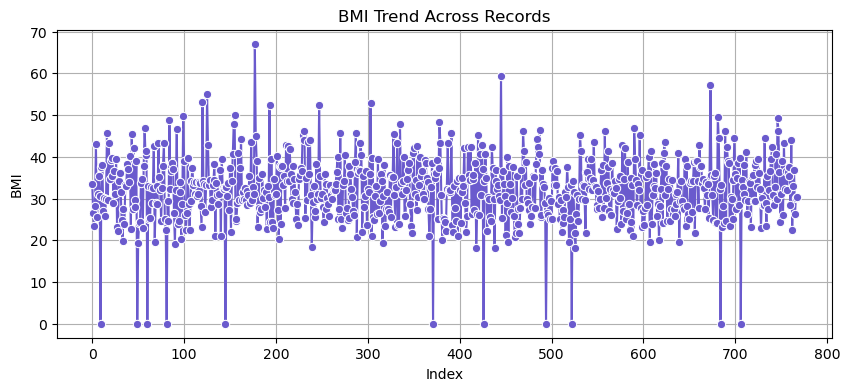

In [365]:

"""
Class Overview:
Executes a series of bivariate plots using previous classes for a complete visual diagnostic.

Method:
- run_all: calls heatmap, scatter, bar, violin, and line plots
"""

class BivariateAnalysisRunner:
    def __init__(self, data):
        self.data = data

    def run_all(self):
        print("🔥 Correlation HeatMap")
        BivariateAnalysis.heatMap(self.data, title="Correlation Heatmap (coolwarm)")

        print("📈 Scatter: Glucose vs Outcome")
        ScatterGlucoseVsOutcome.plot(self.data)

        print("📈 Scatter: BMI vs Outcome")
        ScatterBMIvsOutcome.plot(self.data)

        print("📈 Scatter: Age vs Outcome")
        ScatterAgeVsOutcome.plot(self.data)

        print("📈 Scatter: Insulin vs Outcome")
        ScatterInsulinVsOutcome.plot(self.data)

        print("📊 Barplot: Outcome by Pregnancies")
        AdditionalBivariate1.bar_plot(self.data)

        print("🎻 Violin Plot: Glucose vs Outcome")
        AdditionalBivariate2.violin_plot(self.data)

        print("📉 Line Plot: BMI Trend")
        AdditionalBivariate3.line_plot(self.data)

# Run all bivariate visualizations
bi_runner = BivariateAnalysisRunner(data)
bi_runner.run_all()


## Correlation Analyzer Class

In [368]:

"""
Class Overview:
Analyzes correlation between all features and the target using a labeled threshold dictionary.

Methods:
- get_correlation(): returns DataFrame with feature, correlation score, and interpretation label
"""

class CorrelationAnalyzer:
    threshold_labels = {
        0.6: "Strong Positive Correlation 🔺",
        0.3: "Moderate Positive Correlation ⬆",
        0.1: "Weak Positive Correlation ☝",
        -0.1: "No Significant Correlation ⚪",
        -0.3: "Weak Negative Correlation 👇",
        -0.6: "Moderate Negative Correlation ⬇",
        -1.0: "Strong Negative Correlation 🔻"
    }

    def __init__(self, data):
        self.data = data

    def get_correlation(self):
        """
        Function Overview:
        Maps numeric correlation values to descriptive labels.

        Returns:
        - pd.DataFrame with columns: Feature, Correlation, Analysis
        """
        corr_series = self.data.corr()['Outcome'].drop('Outcome')
        return pd.DataFrame({
            "Feature": corr_series.index,
            "Correlation": corr_series.values,
            "Analysis": [self.map_to_label(val) for val in corr_series.values]
        })

    def map_to_label(self, value):
        thresholds = sorted(self.threshold_labels.items(), reverse=True)
        for threshold, label in thresholds:
            if value >= threshold:
                return label
        return "Strong Negative Correlation 🔻"


# Instantiate the CorrelationAnalyzer class with the dataset
correlation_analyzer = CorrelationAnalyzer(data)

# Get the correlation analysis
correlation_results = correlation_analyzer.get_correlation()

# Display the results
print(correlation_results)

                    Feature  Correlation                         Analysis
0               Pregnancies     0.221898      Weak Positive Correlation ☝
1                   Glucose     0.466581  Moderate Positive Correlation ⬆
2             BloodPressure     0.065068     No Significant Correlation ⚪
3             SkinThickness     0.074752     No Significant Correlation ⚪
4                   Insulin     0.130548      Weak Positive Correlation ☝
5                       BMI     0.292695      Weak Positive Correlation ☝
6  DiabetesPedigreeFunction     0.173844      Weak Positive Correlation ☝
7                       Age     0.238356      Weak Positive Correlation ☝


## Data Splitting

In [370]:
splitter = DataSplitter(data)  # Initialize with the data (replace 'data' with your DataFrame)
X_train, X_test, y_train, y_test = splitter.split_data(test_size=0.2, random_state=42) # Perform the split


✅ Data Splitting Complete:
Training Set Shape (Features): (614, 8)
Testing Set Shape (Features): (154, 8)
Training Set Shape (Target): (614,)
Testing Set Shape (Target): (154,)


## Model Training

In [372]:
# Example usage:
trainer = ModelTrainer(X_train, X_test, y_train, y_test)  # Initialize the trainer with split data
trainer.train_model()  # Train the model
trainer.evaluate_model()  # Evaluate the model performance

✅ Model Training Complete.
Accuracy: 76.62%

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

Confusion Matrix:
 [[87 12]
 [24 31]]


(0.7662337662337663,
 '              precision    recall  f1-score   support\n\n           0       0.78      0.88      0.83        99\n           1       0.72      0.56      0.63        55\n\n    accuracy                           0.77       154\n   macro avg       0.75      0.72      0.73       154\nweighted avg       0.76      0.77      0.76       154\n',
 array([[87, 12],
        [24, 31]], dtype=int64))

## Model Saved

In [374]:


# Save the trained model
saver = ModelSaver(trainer.model)  # Use the trained model from the trainer
saver.save_model()  # Save the model

# Later, you can load the model as follows:
loaded_model = saver.load_model()

✅ Model saved to svm_model.pkl.
✅ Model loaded from svm_model.pkl.
